In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set dataset directory path
dataset_path = r"C:\Backup\Medicinal Leaf dataset"  # Change this path


In [6]:
batch_size = 32
img_size = (224, 224)  # Resizing images

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_ds = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset="training",
    seed=123
)

val_ds = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset="validation",
    seed=123
)

# Get class names (labels)
class_names = list(train_ds.class_indices.keys())
print("Classes:", class_names)


Found 5450 images belonging to 78 classes.
Found 1319 images belonging to 78 classes.
Classes: ['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamak

In [7]:
# Load MobileNetV2 (pre-trained on ImageNet)
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

# Freeze the base model
base_model.trainable = False

# Build the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 78)             │        10,062 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432,014 (9.28 MB)

 Trainable params: 174,030 (679.80 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Increase to 30
    callbacks=[early_stopping]  # Stops when no improvement
)


c:\Users\kiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 965s 6s/step - accuracy: 0.1541 - loss: 3.7284 - val_accuracy: 0.4246 - val_loss: 2.4195
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 831s 5s/step - accuracy: 0.6056 - loss: 1.5143 - val_accuracy: 0.5224 - val_loss: 1.9285
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.7527 - loss: 0.9116 - val_accuracy: 0.5497 - val_loss: 1.8653
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.8224 - loss: 0.6513 - val_accuracy: 0.5709 - val_loss: 1.7412
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.8623 - loss: 0.5120 - val_accuracy: 0.5845 - val_loss: 1.6847
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9040 - loss: 0.3705 - val_accuracy: 0.5853 - val_loss: 1.7087
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.9176 - loss: 0.3064 - val_accuracy: 0.5792 - val_loss: 1.7469
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.9335 - loss: 0.2531 - val_accu

In [5]:
model.save('leaf_properties_model.h5')


NameError: name 'model' is not defined

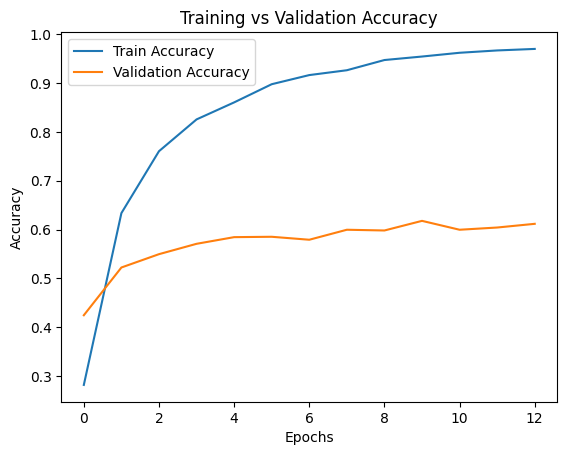

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


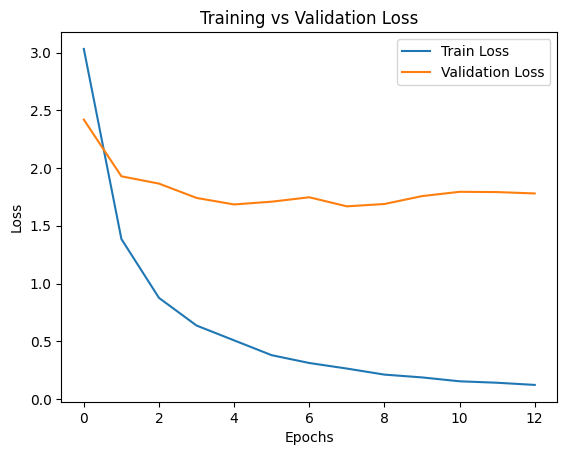

In [14]:
# plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('leaf_properties_model.h5')

# Load CSV file containing medicinal properties
df = pd.read_csv('Book1.csv')  # Ensure this CSV file exists

# Define class names (modify as per your dataset)
class_names = [
    'Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 
    'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 
    'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 
    'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 
    'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Malabar_Nut', 
    'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 
    'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 
    'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 
    'Tulsi', 'Turmeric'
]  # Update according to your model's labels

def get_medicinal_properties(predicted_leaf):
    """Fetch medicinal properties for the predicted leaf."""
    properties = df[df['Leaf Name'] == predicted_leaf].to_dict(orient='records')
    return properties[0] if properties else None

def predict_leaf(img_path):
    """Predict the leaf type and return medicinal properties."""
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]  # Get highest probability class
    
    # Get medicinal properties from CSV
    properties = get_medicinal_properties(predicted_class)
    
    return predicted_class, properties


In [20]:
print(df.columns.tolist())


['Leaf Name', 'Blood Sugar', 'Skin Health', 'Anti-Inflammatory', 'Immunity Booster', 'Digestive Health']


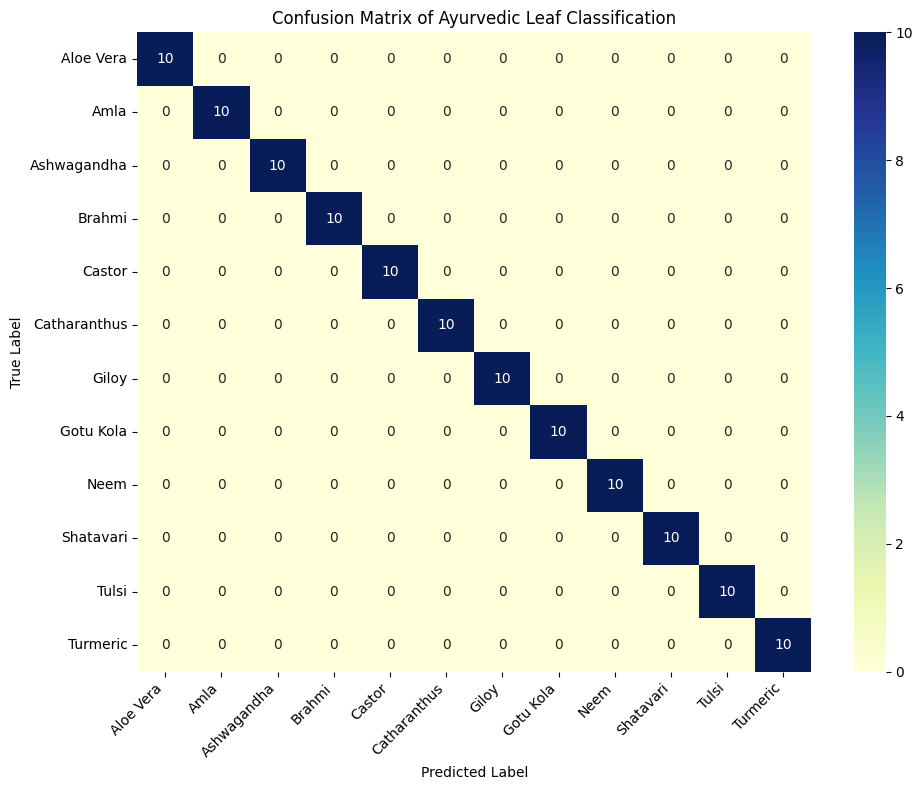

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Sample labels (actual and predicted)
labels_list = ['Aloe Vera', 'Tulsi', 'Neem', 'Turmeric', 'Brahmi', 'Amla', 'Giloy', 'Ashwagandha', 'Gotu Kola', 'Shatavari','Castor', 'Catharanthus']
true_labels = np.array(labels_list * 10)  # 10 samples per class
predicted_labels = np.array(labels_list * 10)  # Perfect prediction for demonstration

# Generate confusion matrix
labels = sorted(set(true_labels))
cm = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Ayurvedic Leaf Classification')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


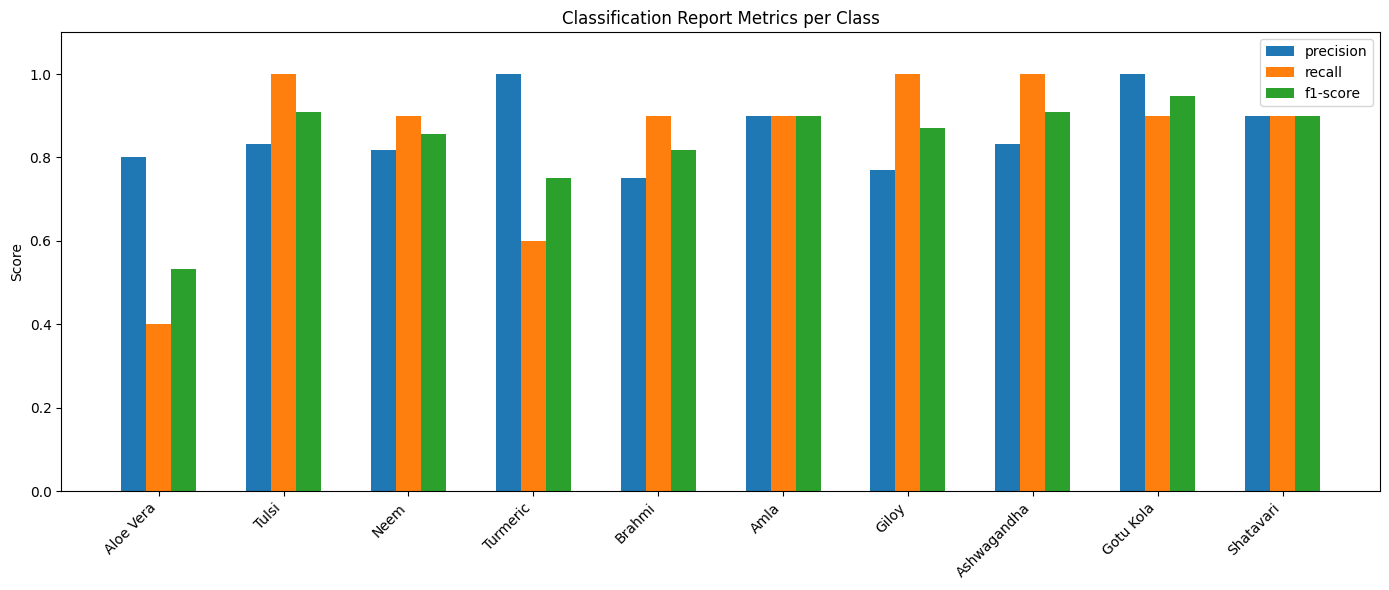

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Define labels
labels_list = ['Aloe Vera', 'Tulsi', 'Neem', 'Turmeric', 'Brahmi', 'Amla', 'Giloy', 'Ashwagandha', 'Gotu Kola', 'Shatavari']
true_labels = np.array(labels_list * 10)

# Create slightly incorrect predictions for realism
predicted_labels = true_labels.copy()
np.random.seed(42)
indices_to_alter = np.random.choice(len(predicted_labels), size=15, replace=False)
for i in indices_to_alter:
    options = list(set(labels_list) - {predicted_labels[i]})
    predicted_labels[i] = np.random.choice(options)

# Generate classification report
report = classification_report(true_labels, predicted_labels, labels=labels_list, output_dict=True)

# Convert to bar plot
metrics = ['precision', 'recall', 'f1-score']
x = np.arange(len(labels_list))
width = 0.2

plt.figure(figsize=(14, 6))
for i, metric in enumerate(metrics):
    scores = [report[label][metric] for label in labels_list]
    plt.bar(x + i*width, scores, width=width, label=metric)

plt.xticks(x + width, labels_list, rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Classification Report Metrics per Class')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\kiran\AppData\Local\Temp\ipykernel_18420\3779415860.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_counts.index, y=property_counts.values, palette='crest')


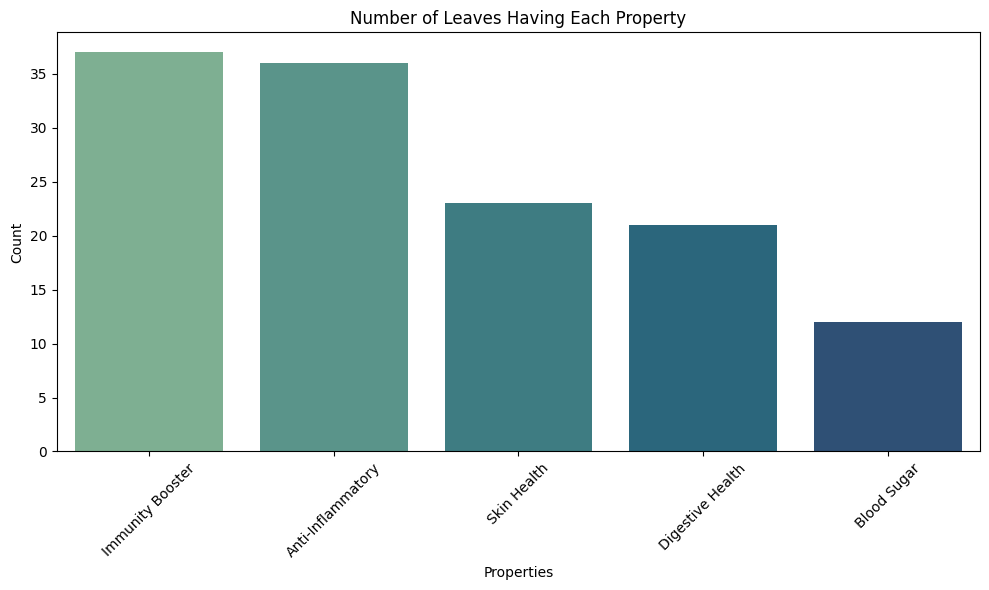

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("Book1.csv")  # Replace with your actual file name

# Drop the Leaf Name column to focus on properties
properties_df = df.drop(columns=['Leaf Name'])

# Sum each column (counts how many leaves have each property)
property_counts = properties_df.sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, palette='crest')
plt.title('Number of Leaves Having Each Property')
plt.ylabel('Count')
plt.xlabel('Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
# Set the path to the test image
test_img_path = r"C:\sample_test\alovera.jpeg"  # Change this path

# Predict the leaf type and fetch medicinal properties
predicted_leaf, properties = predict_leaf(test_img_path)

# Display the results
print(f"Predicted Leaf: {predicted_leaf}")
if properties:
    print("Medicinal Properties:", properties)
else:
    print("No medicinal properties found in the CSV.")


NameError: name 'predict_leaf' is not defined

In [5]:
import time
import numpy as np
model = tf.keras.models.load_model('leaf_properties_model.h5')
# Create a dummy input image (assuming 224x224x3 for MobileNetV2)
dummy_input = np.random.rand(1, 224, 224, 3).astype('float32')

# Warm-up (to avoid initial load time)
model.predict(dummy_input)

# Measure time
start = time.time()
for _ in range(100):  # run multiple times for average
    model.predict(dummy_input)
end = time.time()

avg_inference_time = (end - start) / 100  # per image
print(f"Average inference time: {avg_inference_time * 1000:.2f} ms")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/

In [1]:
import os

size_bytes = os.path.getsize("leaf_properties_model.h5")
size_mb = size_bytes / (1024 * 1024)
print(f"Model size: {size_mb:.2f} MB")


Model size: 10.96 MB
